<a href="https://colab.research.google.com/github/wsno1-lim/DF-AI2team/blob/main/99.%EC%8A%A4%ED%84%B0%EB%94%94/Kaggle/%5BKaggle_3%5D_Stock_Market_Analysis_%2B_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

LSTM 방식을 사용하여 미래 주가 예측

* 문제 정의
  - 시간이 지남에 따라 주가는 어떻게 변했는가?
  - 평균적인 일별 수익률은 얼마인가?
  - 여러 종목의 이동평균값?
  - 종목간의 상관관계?
  - 특정 종목에 투자함으로서 얻게 되는 위험
  - 미래 주가를 어떻게 예측하는가?
  (APPLE 주식의 종가를 LSTM 으로 예측)

* 요약
  - IT관련 대기업들의 상관관계 파악
  - 60일간의 종가로 다음날의 종가 예측

### 1. 시간이 지남에 따라 주가는 어떻게 변했는가?
---
주가정보 분석

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 사용자 설정
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

# 야후에서 주가 데이터를 읽는다
from pandas_datareader.data import DataReader
from datetime import datetime

In [3]:
# 아래 주식을 대상으로 분석 진행
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] 

# 기준일자(1년)
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# 분석을 편하게 하기 위해 글로벌 변수로 데이터프레임 생성
for stock in tech_list :
  globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [6]:
# 각 회사별 df 에 회사명 칼럼을 넣고 전체를 합친다
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name) :
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-01,3248.949951,3157.179932,3188.500000,3220.080078,4544400.0,3220.080078,AMAZON
2020-12-02,3232.000000,3173.260010,3221.649902,3203.530029,3129300.0,3203.530029,AMAZON
2020-12-03,3228.639893,3181.310059,3205.459961,3186.729980,2892000.0,3186.729980,AMAZON
2020-12-04,3198.209961,3158.760010,3198.209961,3162.580078,2913600.0,3162.580078,AMAZON
2020-12-07,3180.760010,3141.689941,3156.479980,3158.000000,2742300.0,3158.000000,AMAZON


In [7]:
# 애플 DF 확인
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,92.742034,90.123026,91.401568,91.502024,1.483661e+08,90.920062
std,21.012432,20.395308,20.886375,20.675716,7.884297e+07,21.033655
min,57.125000,53.152500,57.020000,56.092499,2.019780e+07,55.291519
25%,75.148750,72.361874,73.851248,74.130623,1.015757e+08,72.941904
50%,86.411247,83.073750,83.173752,84.337498,1.345164e+08,84.040722
75%,115.654997,112.387499,114.193125,113.949371,1.848412e+08,113.860874
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-09 to 2020-12-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


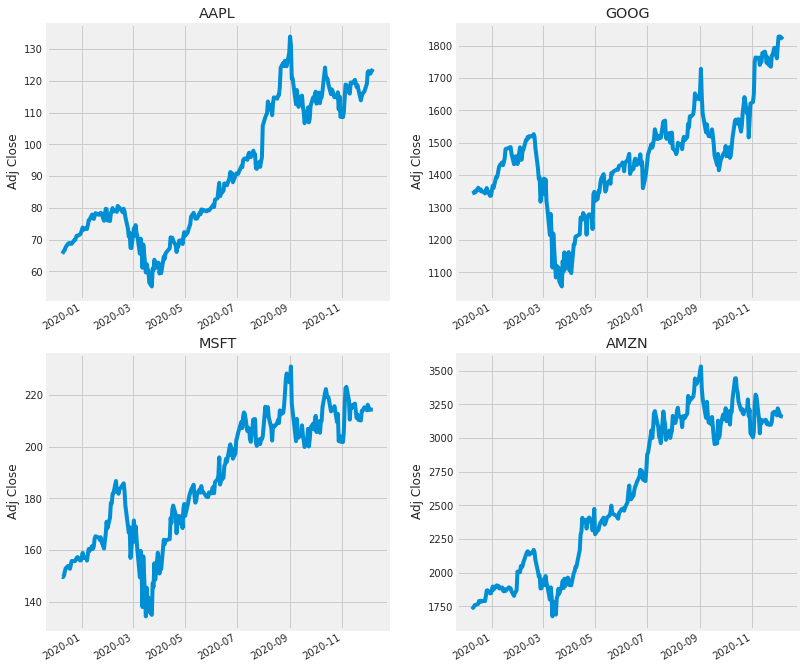

In [9]:
# 각 회사의 종가를 그래프로 그려보기

plt.figure(figsize=(12, 8))
# 서브 플롯간 간격 조정
plt.subplots_adjust(top=1.25, bottom=1.2)

# enumerate : 인덱스 번호와 컬렉션의 원소를 tuple 형태로 변환
for i, company in enumerate(company_list, 1) :
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"{tech_list[i-1]}")


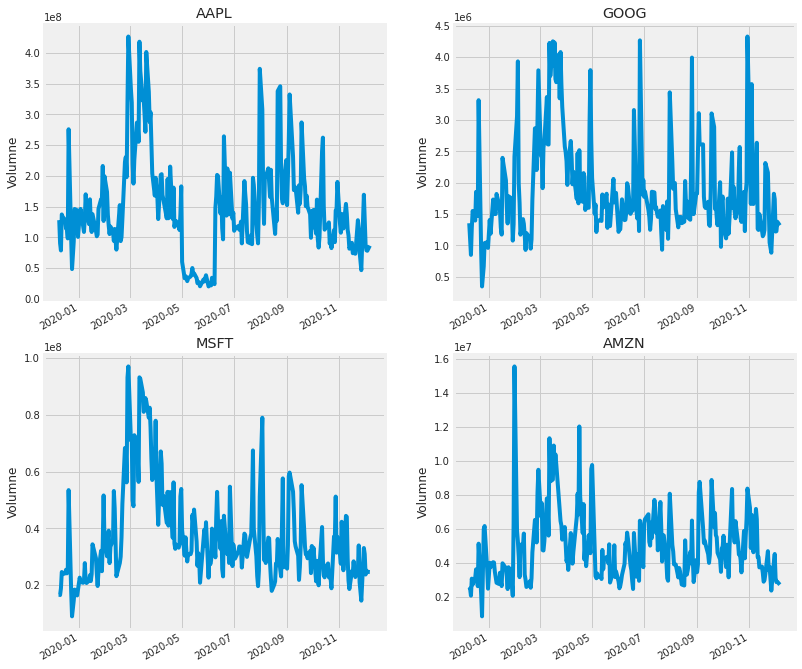

In [10]:
# 일별 거래량 확인해보기
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1) :
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volumne')
  plt.xlabel(None)
  plt.title(f"{tech_list[i - 1]}")

## 2. 여러 종목의 이동평균값?

In [13]:
# 각 종목에 대해 10일, 20일, 50일 이동평균을 구한다
ma_day = [10, 20, 50]

for ma in ma_day :
  for company in company_list :
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()

In [12]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


company_name
AMAZON       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
APPLE        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
GOOGLE       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
MICROSOFT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

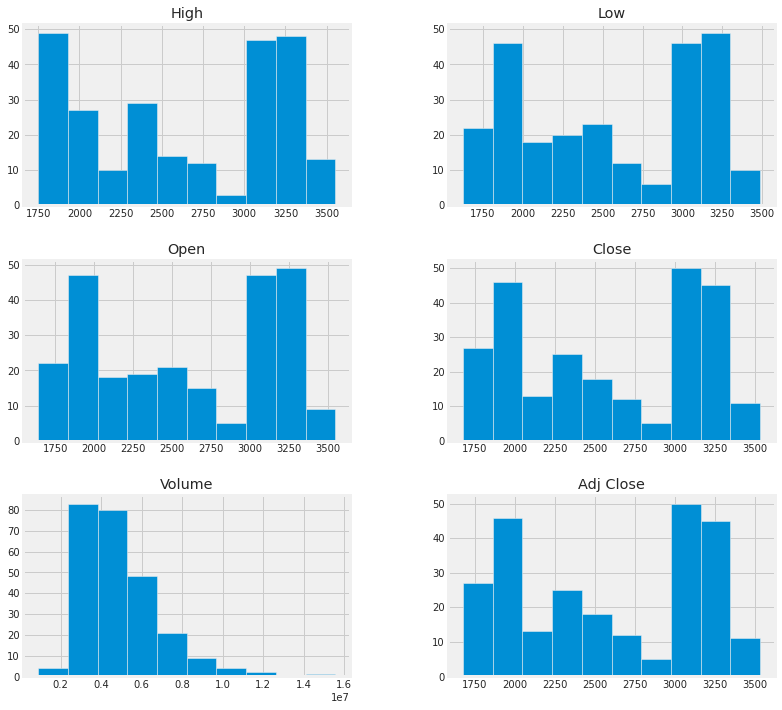

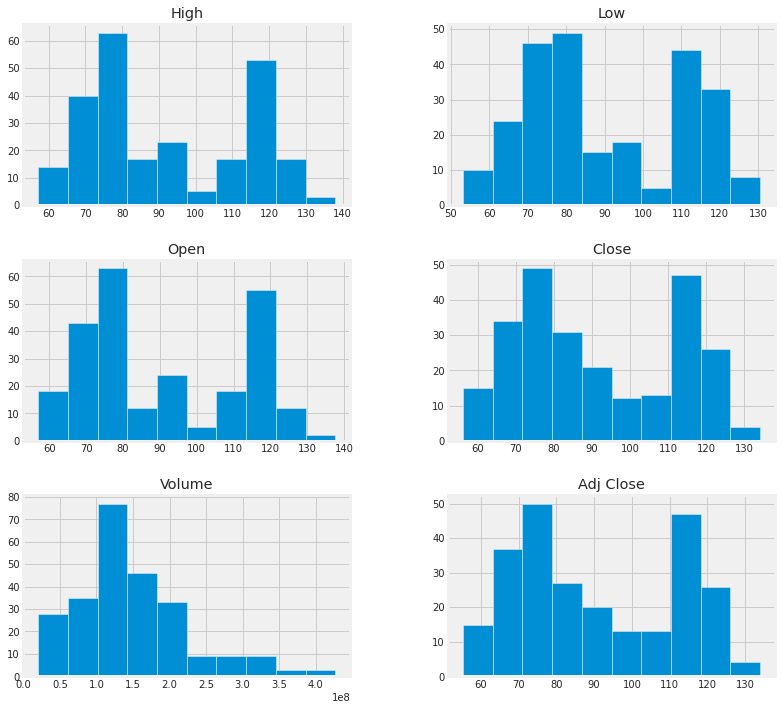

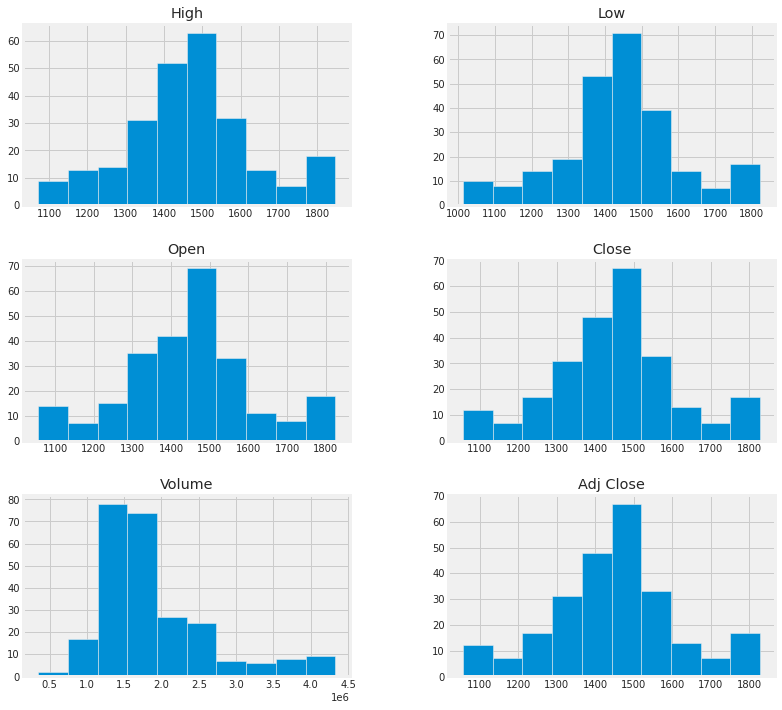

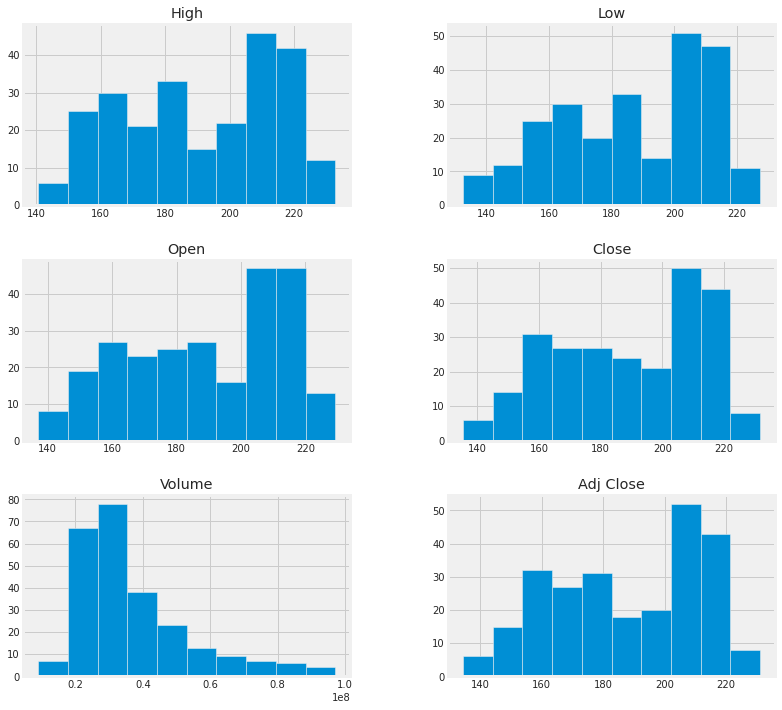

In [14]:
df.groupby("company_name").hist(figsize=(12, 12))

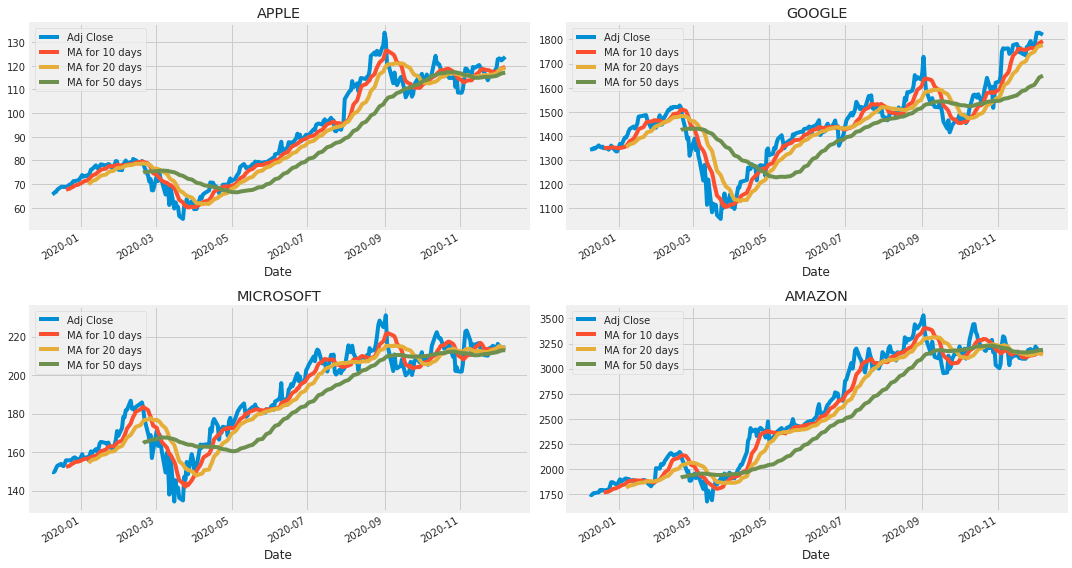

In [16]:
# 각 종목의 종가와 이동평균 시각화
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 3. 평균적인 일별 수익률은 얼마인가?

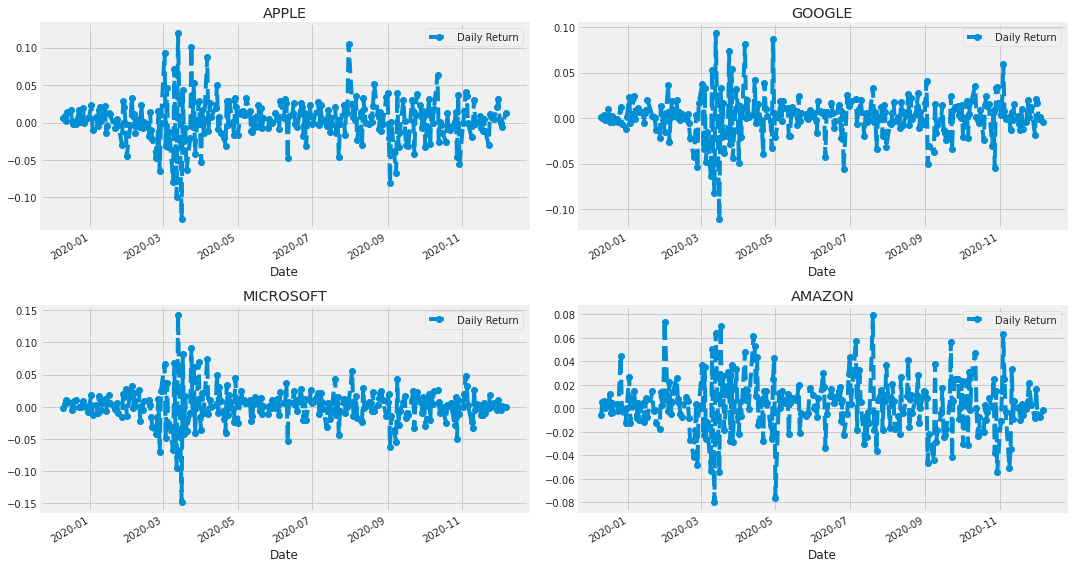

In [19]:
# pct_change 함수를 사용하여 일별 변화율을 구할 수 있다
for company in company_list :
  company['Daily Return'] = company['Adj Close'].pct_change()

# 일별 변화율 그려보기
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

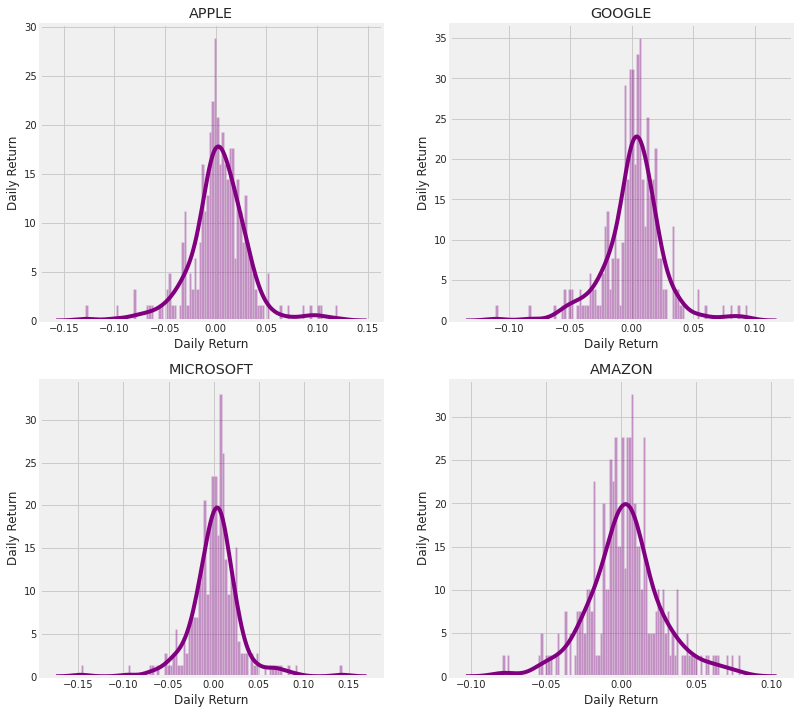

In [21]:
# 히스토그램을 사용한 평균 변화율 확인하기
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1) :
  plt.subplot(2, 2, i)
  # bins = 막대사이 간격조정
  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
  plt.ylabel('Daily Return')
  plt.title(f'{company_name[i-1]}')

## 4. 각 종목의 종가간 상관관계?

In [22]:
# 하나의 df 에 모든 종목의 종가를 넣는다
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-09,65.621384,1343.560059,149.773361,1749.510010
2019-12-10,66.004898,1344.660034,149.545792,1739.209961
2019-12-11,66.567886,1345.020020,150.109772,1748.719971
2019-12-12,66.737518,1350.270020,151.633667,1760.329956
2019-12-13,67.644707,1347.829956,152.910126,1760.939941


In [24]:
# 일별 종가 변화량 넣어주기
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-09,NaN,NaN,NaN,NaN
2019-12-10,0.005844,0.000819,-0.001519,-0.005887
2019-12-11,0.008529,0.000268,0.003771,0.005468
2019-12-12,0.002548,0.003903,0.010152,0.006639
2019-12-13,0.013593,-0.001807,0.008418,0.000347


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


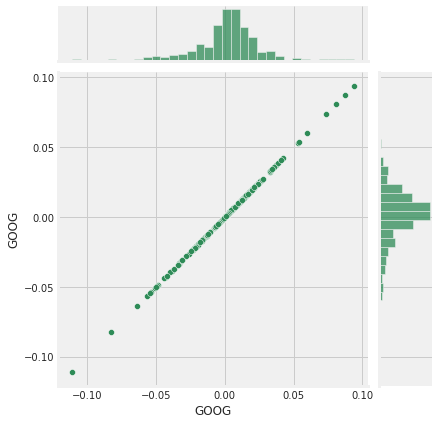

In [25]:
# 자기 자신과 비교해보기 : 기울기 1인 선형 형태
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


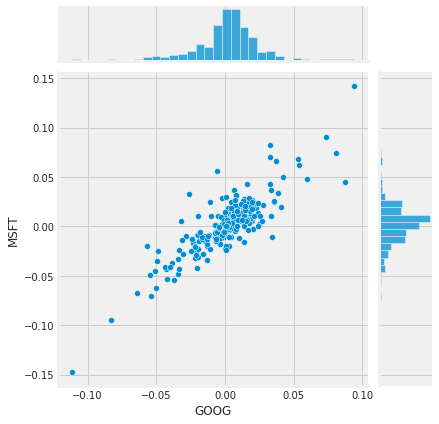

In [26]:
# google 과 microsoft 비교 : 양의 상관관계(선형)
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

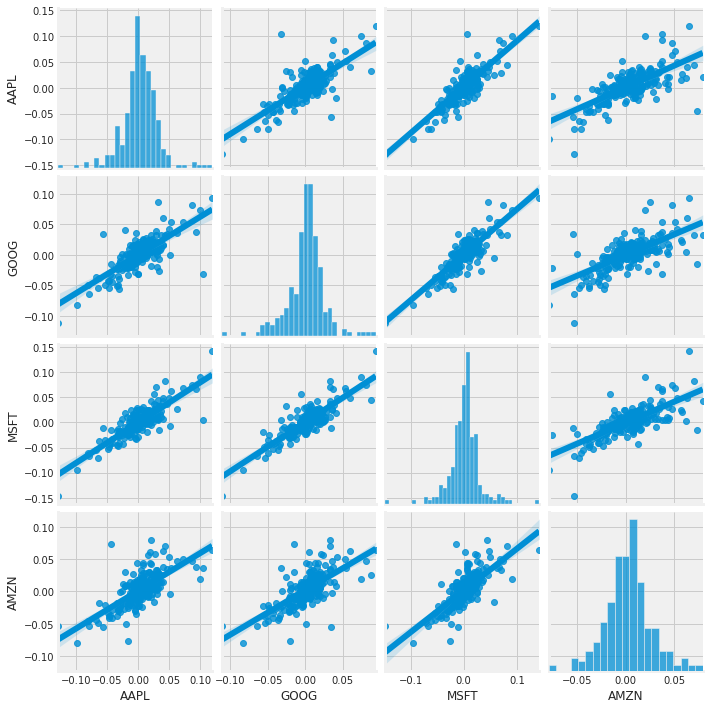

In [27]:
# pairplot 을 사용하면 여러 종목에 대해 한번에 비교할 수 있다
# 각 종목마다 대체적으로 양의 선형관계를 가지고 있다
sns.pairplot(tech_rets, kind='reg')

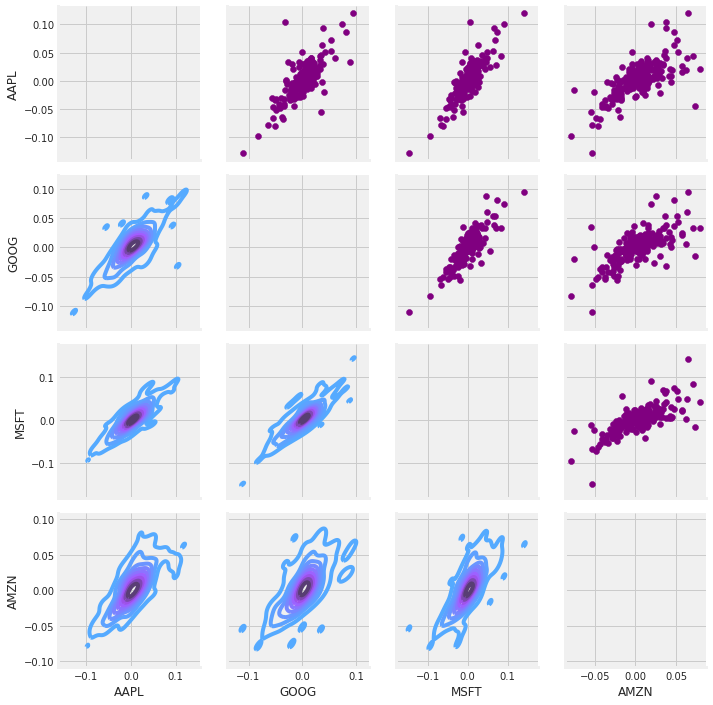

In [30]:
# PairGrid 라는 함수를 사용해서, 위/아래/대각선에 어떤 그래프를 보여줄 것인지 설정할 수 있다
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
# KDE : 커널 밀도 추정, 히스토그램 분포를 스무딩하게 표현
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
# 이상하게 내 COLAB 에서는 히스토그램이 안나온다..
return_fig.map_diag(plt.hist, bins=30)

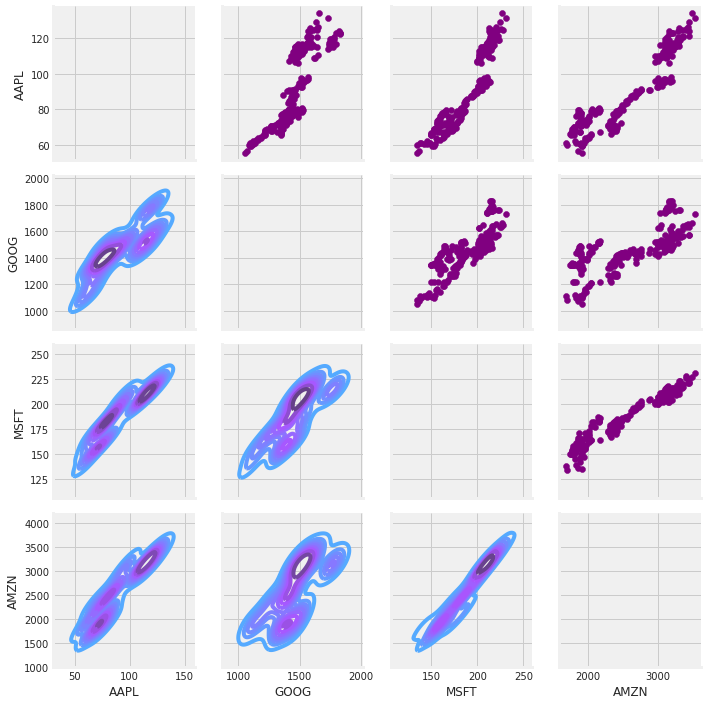

In [31]:
# 이번에는 종가를 기준으로 그려본다
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

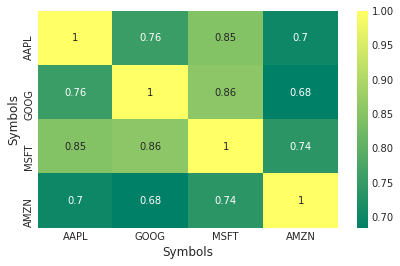

In [32]:
# 상관관계를 수치로 표현하기 위해 다음 그래프를 사용할 수 있다
# 주의 : 두 변수간에 상관관계가 있다고 해서 인과관계가 있는 것은 아니다(회귀분석 필요)
# corr() : 상관 계수 구하기(기본적으로 피어슨 상관계수 사용)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

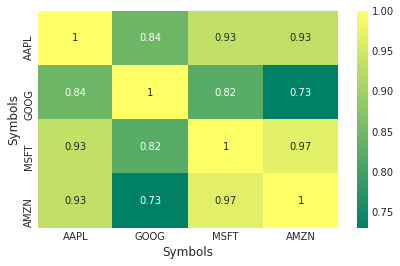

In [34]:
# 종가에 대해서도 구해본다 - 마이크로소프트와 아마존이 강한 양의 상관관계를 갖는다는 것을 확인할 수 있다
# 또한, IT기술 회사들 사이에 서로 양의 상관관계가 있음을 추측할 수 있다
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## 5. 특정 종목에 투자함으로서 얻게 되는 위험
* 수익률과 표준편차 확인
  - 표준편차가 높을수록 변동성(위험)이 커진다

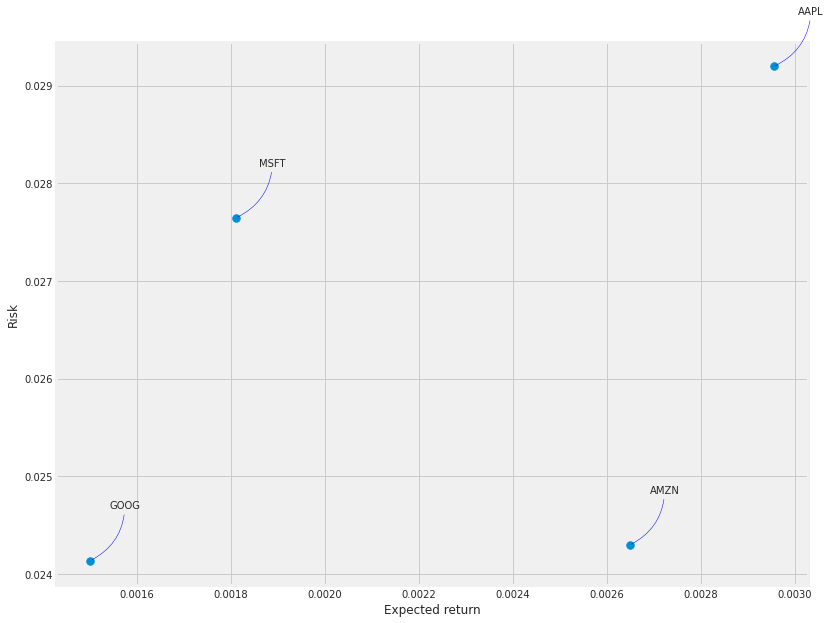

In [35]:
rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
              arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6. APPLE 사의 종가 예측하기

In [37]:
# 2012년부터 현재까지의 애플 종목 주가 가져오기
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549
...,...,...,...,...,...,...
2020-12-01,123.470001,120.010002,121.010002,122.720001,128166800.0,122.720001
2020-12-02,123.370003,120.889999,122.019997,123.080002,89004200.0,123.080002
2020-12-03,123.779999,122.209999,123.519997,122.940002,78967600.0,122.940002


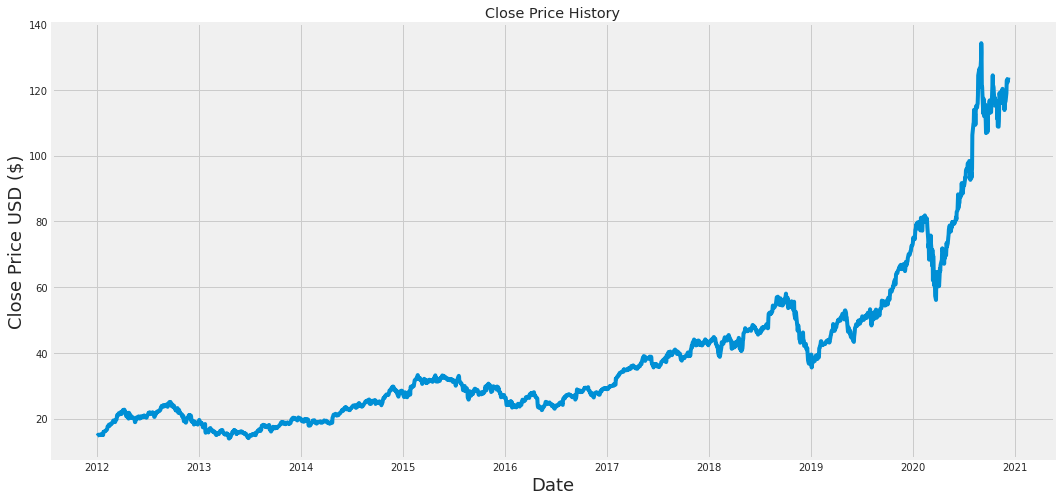

In [40]:
# 그래프로 확인
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [43]:
data = df.filter(['Close'])
# 데이터프레임을 numpy array 로 바꿔주기
dataset = data.values

#ceil : 올림
training_data_len = int(np.ceil(len(dataset) * .8))
training_data_len

1799

In [45]:
# 0 ~ 1 사이로 데이터 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.90651454],
       [0.90077564],
       [0.91325146]])

In [48]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

# 60일간의 종가를 보고 다음날의 종가 예측
for i in range(60, len(train_data)) :
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [49]:
x_train, y_train = np.array(x_train), np.array(y_train)

# LSTM에 넣기 위해 reshape 해준다
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape 

(1739, 60, 1)

In [50]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM 모델 만들기
model = Sequential()
# LSTM 레이어를 쌓아올릴 때는 return_sequences 를 True로 설정한다
# LSTM 을 사용하기 위해서는 3차원 데이터가 필요(batch_size, timesteps, input_dim)
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

1739/1739 [==============================] - 36s 21ms/step - loss: 3.7016e-04


In [52]:
# test 데이터 셋 만들기
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)) :
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
predictions = model.predict(x_test)
# 정규화 시킨 값을 원복해준다
predictions = scaler.inverse_transform(predictions)

# root mean squared error 구하기
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.220352926170223

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


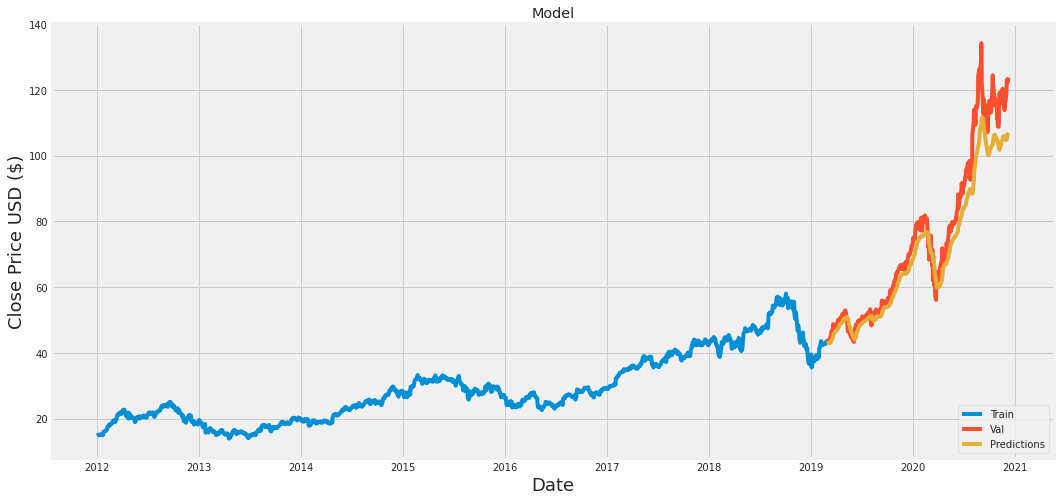

In [54]:
# 그래프로 확인
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [55]:
valid

,Close,Predictions
Date,,
2019-02-28,43.287498,42.687267
2019-03-01,43.742500,42.768532
2019-03-04,43.962502,42.857605
2019-03-05,43.882500,42.960991
2019-03-06,43.630001,43.057446
...,...,...
2020-12-01,122.720001,104.791809
2020-12-02,123.080002,105.246056
2020-12-03,122.940002,105.856682


### 문제점
2번과 마찬가지로, 다음날의 종가를 예측할 때 이전 예측값을 사용하지 않고 실제값을 사용하므로 예측이 정확해 보일 수 있음. 예측값을 계속 사용해야 정확한 평가를 내릴 수 있음